<a href="https://colab.research.google.com/github/ClassicRevive/ds_projects/blob/main/CA270_Clutstering_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CA270 Clustering Project


### Section 1: Dataset Description


*We found this dataset in the [PyCaret library](https://www.kaggle.com/ahmettezcantekin/beginner-datasets)*

&nbsp;

**Name:** Employee.csv

**Description:** This dataset records the features of ~15,000 employees at
an unnamed company. It consists of a mix of both categorical and numerical variables.

&nbsp;

**Attributes:**

- **satisfaction_level:** Satisfaction levels for employees in range [0, 1]

- **last_evaluation:** Most recent work performance evaluation in range [0, 1] 

- **number_project:** Number of projects employee is involved in

- **average_monthly_hours** Average amount of hours an employee does a month

- **time_spend_company:** Number of years spent at the company

- **Work_accident:** Suffered from a work accident. 1: True, 0: False

- **promotion_last_5_year:** Promoted in the last 5 years. 1: True, 0: False

- **department** The department to which an employee belongs

- **salary:** catagorical [low, medium, high]

- **left:** Left the workplace. 1: True, 0: False  

&nbsp;

As can be seen, the dataset does contain both categorical and numerical attributes. In this project, we will attempt to form multiple clusters of employees and class them according to the "left" class. A cluster of tuples will be labelled 1 if this group of employees are predicted to leave, and 0 if they are believed to stay.

*Insert the brief description of the 2 methods here*





### Section 2A: Analysis of the Dataset - Joseph

In [ ]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving employee.csv to employee.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['employee.csv']))

In [ ]:
df.shape

(14999, 10)

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [ ]:
# typo in "average_montly_hours"
df.dtypes
corrections = {"average_montly_hours": "average_monthly_hours"}
df = df.rename(columns=corrections)



I want to visualize the distributions of performance, satisfaction levels, numbers of projects, and average monthly hours.


The vast majority of employees showed satisfaction levels greater than 50%. There is a spike at the low end of satisfaction reports. 

A large proportion of employees who left had a satisfaction level lower than 0.5. Besides this, a considerable proportion of employees with low satisfaction levels (<0.3) stayed, and some employees with high satisfaction left.


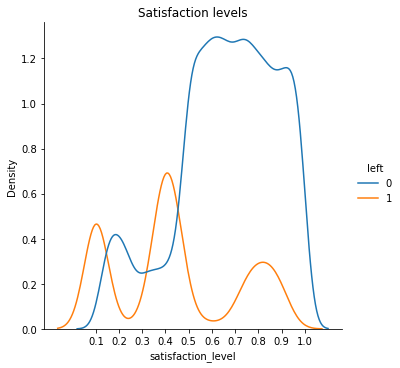

In [ ]:
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

sns.displot(x="satisfaction_level", hue="left", data=df, kind="kde")
plt.xticks(x)
plt.title("Satisfaction levels")
plt.show()

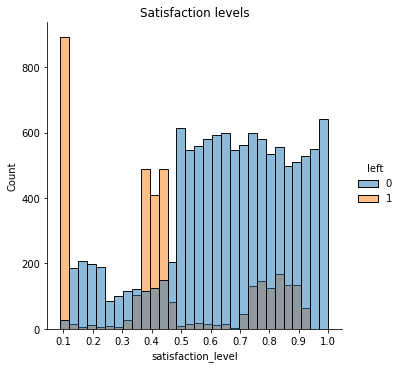

In [ ]:
sns.displot(x="satisfaction_level", hue="left", data=df)
plt.xticks(x)
plt.title("Satisfaction levels")
plt.show()

This performance histogram plot shows that employees with median performance report figures don't tend to leave the company. This attribute may contribute greatly to the generation of the clusters.


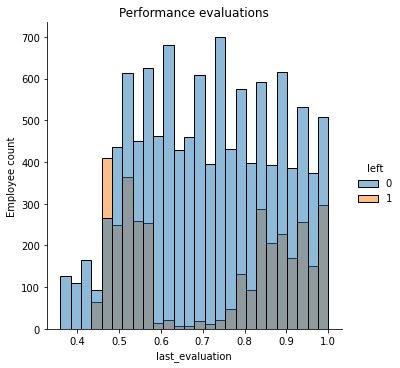

In [ ]:
sns.displot(x="last_evaluation", data=df, hue="left", )
plt.title("Performance evaluations")
plt.ylabel("Employee count")
plt.show()

For employees working on 2, 6, and 7 projects we observed that the number of employees who left the company are more than those who stayed at the company. In fact, employees put on 7 projects all left the company! This is a strong statistic that will certainly be a driver for clustering.

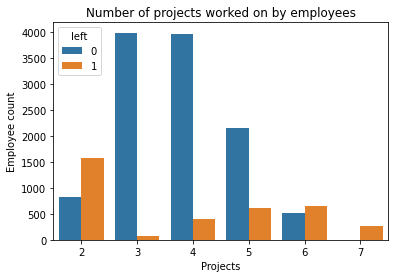

In [ ]:
sns.countplot(x="number_project", data=df, hue="left")
plt.title("Number of projects worked on by employees")
plt.xlabel("Projects")
plt.ylabel("Employee count")
plt.show()

In [ ]:
# count the number of employees on 7 projects who left the company
seven = df[df['number_project'] == 7]
seven.groupby('left').count().iloc[:, 0]

left
1    256
Name: satisfaction_level, dtype: int64

Here we see a bimodal distribution with high number of employees with hours around 150 and hours around 250. When we split the plot into groups on "left", we see most employees that left are employees with work hours around these modes. i.e. not around the median. Also, employees with significantly high work hours (> 275) show higher tendency to quit.

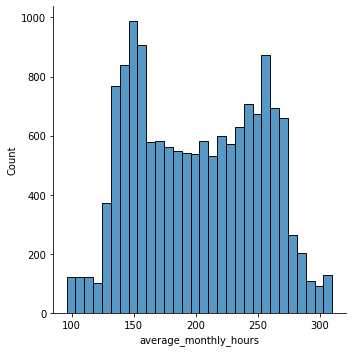

In [ ]:
sns.displot(x='average_monthly_hours', data=df)
plt.show()

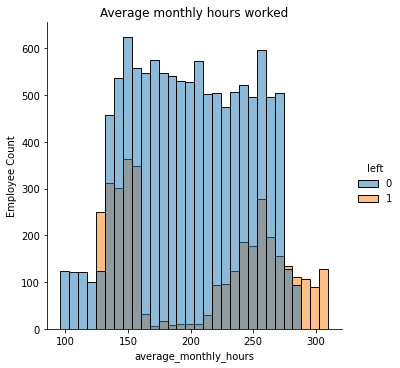

In [ ]:
g=sns.displot(x='average_monthly_hours', data=df, hue="left")
g.ax.set_title("Average monthly hours worked")
g.ax.set_ylabel("Employee Count")
plt.show()

In [ ]:
overtime = df[df['average_monthly_hours'] > 275]
total = overtime.groupby("left").count().iloc[:, 0].sum()
quit = overtime.groupby("left").count().iloc[1, 1]

print("Proportion of overtimers (> 275 hrs) that quit: {:f}".format(quit/total))


Proportion of overtimers (> 275 hrs) that quit: 0.750353


###Section 2B: Analysis of the Dataset - Adam

As can be seen in the graph beside, there is an even spread of people leaving the company across all departments with regards to the proportion of people in a department. This shows to me that no one department is much worse than the others to work for. It can be seen also that the people in management have a lower proportion of people leaving just from looking at the graph.

The proportions however show that hr loses the most staff as a proportion of the total staff in that department with 30% leaving. Only 14.5% of management left. As there isn't a huge spread between departments and majority lie somewhere in the middle I don't believe departments will be a huge help in classifying clusters.

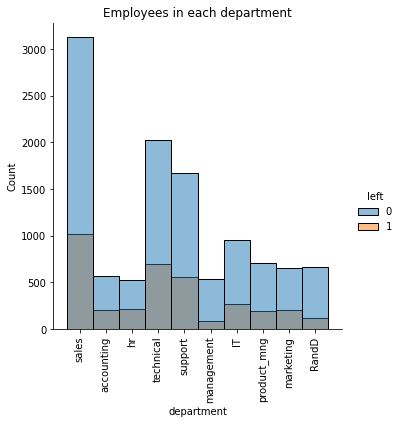

In [ ]:
sns.displot(x="department", data=df, hue="left")
plt.title("Employees in each department")
plt.xticks(rotation=90)
plt.show()

In [ ]:
props = [0.29093369418132614, 0.2365967365967366, 0.14444444444444443, 0.26597131681877445, 0.2489905787348587, 0.15374841168996187, 0.21951219512195122, 0.25625, 0.24492753623188407, 0.22249388753056235]
departs = ['Human Resources', 'Marketing', 'Management', 'Accounting', 'Support', 'Research & Development', 'Product Management', 'Technical', 'Sales', 'IT']
props_of_left_by_depart = pd.DataFrame(props, index=departs, columns=['prop'])
print(props_of_left_by_depart)

                            prop
Human Resources         0.290934
Marketing               0.236597
Management              0.144444
Accounting              0.265971
Support                 0.248991
Research & Development  0.153748
Product Management      0.219512
Technical               0.256250
Sales                   0.244928
IT                      0.222494


It can be seen below that in majority of the departments there are a lot more people with a low salary, which you would expect. In management however majority of staff have a high or medium salary. Research and Development have slightly more people with a medium salary, and in Accounting this is almost the case.

In the second graph you can see that very few people with a high salary left, majority were people on low wages, but again a proportion is necessary to see just what percentage of people which each salary left.

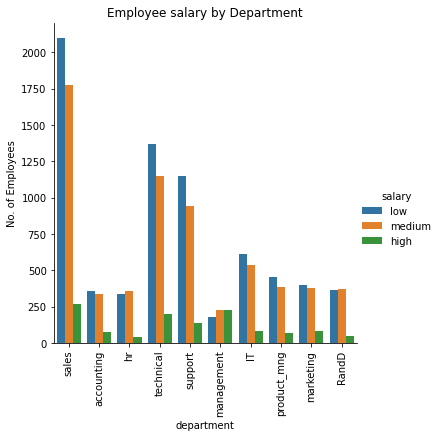

In [ ]:
sns.catplot(data=df, x="department", kind="count", hue="salary")
plt.title("Employee salary by Department")
plt.xticks(rotation=90)
plt.ylabel("No. of Employees")
plt.show()

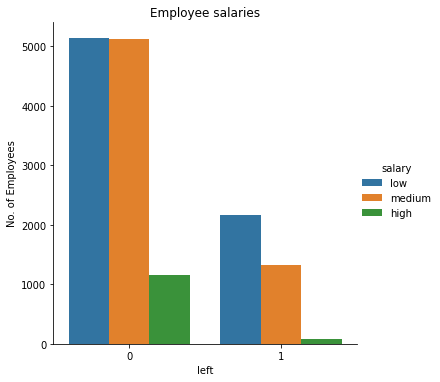

In [ ]:
sns.catplot(data=df, x="left", kind="count", hue="salary")
plt.title("Employee salaries")
plt.ylabel("No. of Employees")
plt.show()

Promotions seem to be a rare thing in this company. Of the people who were lucky enough to receieve one, only a couple left. It can be seen by comparing the 2 sets of bars that the likelihood of an employee leaving having gotten a promotion was much lower than if they hadn't

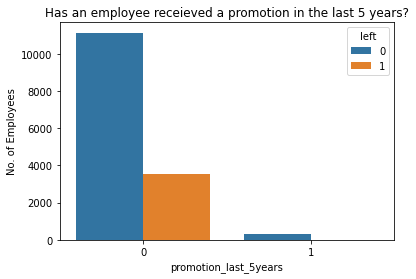

In [ ]:
sns.countplot(x="promotion_last_5years", data=df, hue="left")
plt.title("Has an employee receieved a promotion in the last 5 years?")
plt.ylabel("No. of Employees")
plt.show()

Whether or not an employee had an accident or not didn't impact an employee staying or leaving. If anything the graph shows that the opposite is true. a smaller percentage of the people who had a work accident left the company than those that had no work accident. This may be as a result of the copious amounts of compensation they may have recieved as a result.

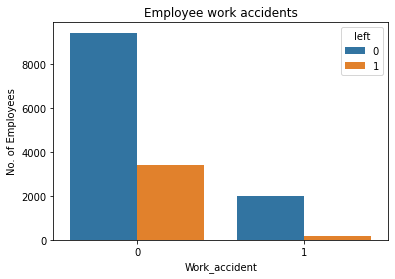

In [ ]:
sns.countplot(x="Work_accident", data=df, hue="left")
plt.title("Employee work accidents")
plt.ylabel("No. of Employees")
plt.show()

This graph shows that any employee that has been working at this compnay for 7+ years will most likely not leave. It seems an employee will usually work for 3 years at least before quitting, this should be useful for our clustering algorithms.

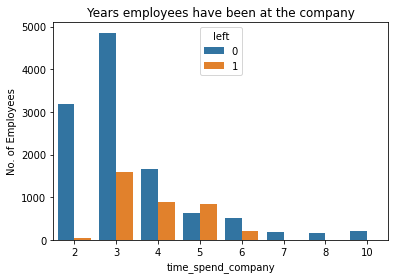

In [ ]:
sns.countplot(x="time_spend_company", data=df, hue="left")
plt.title("Years employees have been at the company")
plt.ylabel("No. of Employees")
plt.show()

### Section 4A: results (implementing) - Joseph

In [ ]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

# drop the classes column for the clustering
c_df = df.drop(columns=['left'])


   satisfaction_level  last_evaluation  number_project  ...  department  salary  left
0                0.38             0.53               2  ...       sales     low     1
1                0.80             0.86               5  ...       sales  medium     1
2                0.11             0.88               7  ...       sales  medium     1
3                0.72             0.87               5  ...       sales     low     1
4                0.37             0.52               2  ...       sales     low     1

[5 rows x 10 columns]


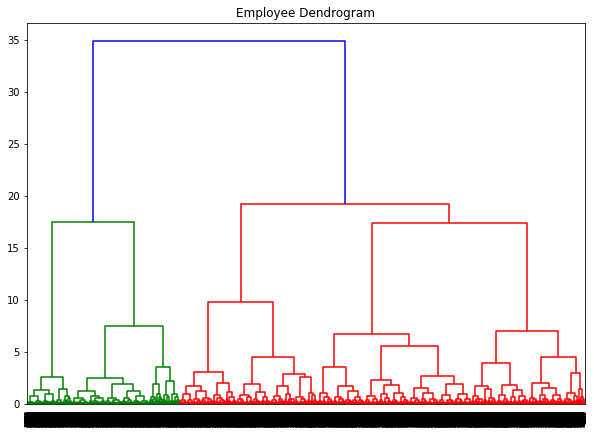

In [ ]:

# produce a sample dendrogram
dendrogram_test = df.iloc[:, :2]
print(df.head())

plt.figure(figsize=(10, 7))
plt.title('Employee Dendrogram')
dend = shc.dendrogram(shc.linkage(dendrogram_test, method='ward'))
plt.show()



In [ ]:

# encode categorical variables
c_df.drop(columns=['department'], inplace=True)
c_df['salary'] = c_df['salary'].astype('category')
c_df['salary'] = c_df['salary'].cat.codes

c_df.head()
c_df.dtypes


satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
salary                      int8
dtype: object

In [ ]:
cluster = AgglomerativeClustering(n_clusters=2,
                                  affinity='euclidean',
                                  linkage='single')
result = cluster.fit_predict(c_df)
c_df['cluster'] = result
# print(c_df.head())

# check 'left' column in comparison with 'cluster' column
print('Correct clusters: {}/14999\nAccuracy: {}'.format((c_df['cluster'] == df['left']).sum(),
                                                        (c_df['cluster'] == df['left']).mean()))



Correct clusters: 11424/14999
Accuracy: 0.7616507767184479


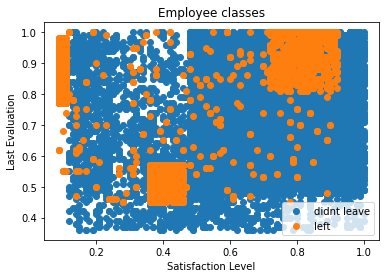

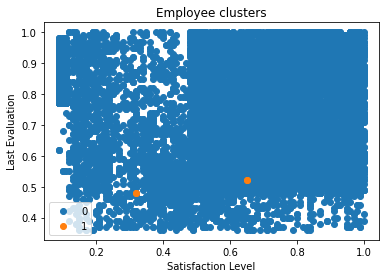

In [ ]:

# compare clusters and pre-assigned classes
groups = df.groupby('left')
fig, ax = plt.subplots()

for name, group in groups:
    ax.scatter(group.satisfaction_level, group.last_evaluation, label=name)

ax.legend(['didnt leave','left'])
ax.set(xlabel='Satisfaction Level', ylabel='Last Evaluation', title='Employee classes')

###

groups = c_df.groupby('cluster')
fig2, ax2 = plt.subplots()

for name, group in groups:
    ax2.scatter(group.satisfaction_level, group.last_evaluation, label=name)

ax2.legend()
ax2.set(xlabel='Satisfaction Level', ylabel='Last Evaluation', title='Employee clusters')
plt.show()


Although in this assignment we are aware of the number of classes prior to implementing clustering, I wanted to check that two clusters would be the optimal number using a dendrogram. I obtained the following: 

The Dendrogram suggests that 2 clusters would be the most suitable number to extract.  The dendrogram was produced on the satisfaction_level and last_evaluation attributes.

My plan initially was to use Gower distance to measure the distance between points but upon attempting this I obtained an interesting error:  “Memory error: 15.6 GiB of memory cannot be allocated to (14999, 14999, 9) nd array” 
The distance measure which I intended to use produced a tensor which was too large for my computer’s RAM to process. As A result of this, I decided to attempt to use Manhattan distance instead and OneHotEncoding/Label Encoding for categorical variables where necessary. Based on our analysis of the dataset, I decided to drop the department variable at this point. 

Results:
Correct clusters: 11424 / 14999
Accuracy:  0.761650

Analysis of the clusters revealed that only 4 employees formed the “left” cluster. I thought that this is probably due to the use of Manhattan distance in an already normalized dataset. Upon using Euclidean distance my results were identical. 
Trying a series of other linkage methods other than ‘single-link’ such as ‘ward’  I obtained much different results which had higher ‘left’ counts but lower accuracy due to false positives. Intuitively, most employees are likely to not quit so assuming all employees will not quit yields high naive accuracy. This is similar to the results above. The normalized nature of the data may have come to be a disadvantage when implementing agglomerative hierarchical clustering as the majority of the data is very clustered together. 



### Section 4B: implemeniting (Adam)

In [ ]:
from sklearn.cluster import KMeans
a_df = df.drop(columns=["left", "department"])
a_df.tail(20)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
14979,0.09,0.93,6,296,4,0,0,medium
14980,0.76,0.89,5,238,5,0,0,high
14981,0.73,0.93,5,162,4,0,0,low
14982,0.38,0.49,2,137,3,0,0,medium
14983,0.72,0.84,5,257,5,0,0,medium
14984,0.40,0.56,2,148,3,0,0,medium
14985,0.91,0.99,5,254,5,0,0,medium
14986,0.85,0.85,4,247,6,0,0,low
14987,0.90,0.70,5,206,4,0,0,low
14988,0.46,0.55,2,145,3,0,0,low


In [ ]:
a_df['salary'] = a_df['salary'].astype('category')
a_df.head()
a_df['salary'] = a_df['salary'].cat.codes
a_df.tail(20)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
14979,0.09,0.93,6,296,4,0,0,2
14980,0.76,0.89,5,238,5,0,0,0
14981,0.73,0.93,5,162,4,0,0,1
14982,0.38,0.49,2,137,3,0,0,2
14983,0.72,0.84,5,257,5,0,0,2
14984,0.40,0.56,2,148,3,0,0,2
14985,0.91,0.99,5,254,5,0,0,2
14986,0.85,0.85,4,247,6,0,0,1
14987,0.90,0.70,5,206,4,0,0,1
14988,0.46,0.55,2,145,3,0,0,1


In [ ]:
# standardizing the data
a_df["salary"].replace({0:3}, inplace=True)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(a_df)

# statistics of scaled data
a_df = pd.DataFrame(data_scaled)
a_df.head()

,0,1,2,3,4,5,6,7
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,-0.933368
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,0.636092
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,0.636092
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,-0.933368
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,-0.933368


In [ ]:
a_df.head()

,0,1,2,3,4,5,6,7
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,-0.933368
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,0.636092
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,0.636092
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,-0.933368
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,-0.933368


In [ ]:
cluster = KMeans(n_clusters=8, n_init=30)
result = cluster.fit_predict(a_df)
a_df["prediction"] = result
a_df["left"] = df["left"]
a_df

,0,1,2,3,4,5,6,7,prediction,left
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,-0.933368,1,1
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,0.636092,3,1
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,0.636092,5,1
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,-0.933368,3,1
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,-0.933368,1,1
...,...,...,...,...,...,...,...,...,...,...
14994,-0.856051,-0.853580,-1.462863,-1.002181,-0.341235,-0.411165,-0.147412,-0.933368,1,1
14995,-0.976716,-1.379394,-1.462863,-0.821970,-0.341235,-0.411165,-0.147412,-0.933368,1,1
14996,-0.976716,-1.087275,-1.462863,-1.162368,-0.341235,-0.411165,-0.147412,-0.933368,1,1
14997,-2.022479,1.424944,1.782438,1.580845,0.343655,-0.411165,-0.147412,-0.933368,5,1


In [ ]:
stats = a_df.groupby("prediction")[["left"]].mean()
print(stats)
#a_df.loc[stats[["left"]] >= 0.5, "prediction"] = 10
#a_df.loc[a_df["prediction"] != 10, "prediction"] = 0
#a_df.loc[a_df["prediction"] == 10, "prediction"] = 0
a_df.head()
#print("correctly predicted:" + str((a_df["prediction"] == df["left"]).sum()) + " of 14999")


                left
prediction          
0           0.063278
1           0.653999
2           0.005926
3           0.740835
4           0.013957
5           0.605678
6           0.059561
7           0.019768


,0,1,2,3,4,5,6,7,prediction,left
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,-0.933368,1,1
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,0.636092,3,1
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,0.636092,5,1
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,-0.933368,3,1
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,-0.933368,1,1


In [ ]:
a_df["prediction"].replace({0:0, 1:1, 2:0, 3:1, 4:0, 5:1, 6:0, 7:0, 8:0}, inplace=True)
a_df.head()

,0,1,2,3,4,5,6,7,prediction,left
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,-0.933368,1,1
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,0.636092,1,1
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,0.636092,1,1
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,-0.933368,1,1
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,-0.933368,1,1


In [ ]:
print("Correctly predicted:" + str((a_df["prediction"] == df["left"]).sum()) + " of 14999")
print("Accuracy:" + str((a_df["prediction"] == df["left"]).mean()))

Correctly predicted:13025 of 14999
Accuracy:0.8683912260817388


In [ ]:
a_df = a_df.drop(columns=["prediction", "left"])

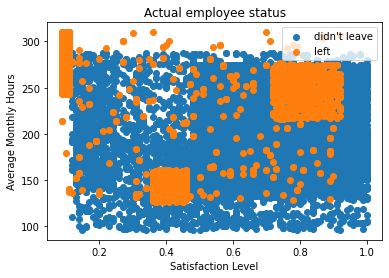

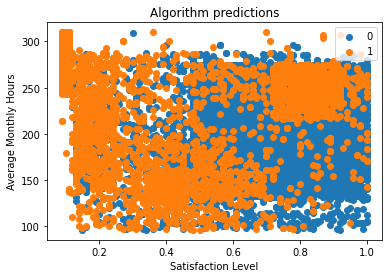

In [ ]:
groups = df.groupby('left')
fig, ax = plt.subplots()

for name, group in groups:
    ax.scatter(group.satisfaction_level, group.average_monthly_hours, label=name)

ax.legend(["didn't leave",'left'])
ax.set(xlabel='Satisfaction Level', ylabel='Average Monthly Hours', title='Actual employee status')

###
new_df = df.drop(columns=["left", "department"])
new_df["prediction"] = a_df["prediction"]
groups = new_df.groupby('prediction')
fig2, ax2 = plt.subplots()

for name, group in groups:
    ax2.scatter(group.satisfaction_level, group.average_monthly_hours, label=name)

ax2.legend()
ax2.set(xlabel='Satisfaction Level', ylabel='Average Monthly Hours', title='Algorithm predictions')
plt.show()
